## 程式基礎題型
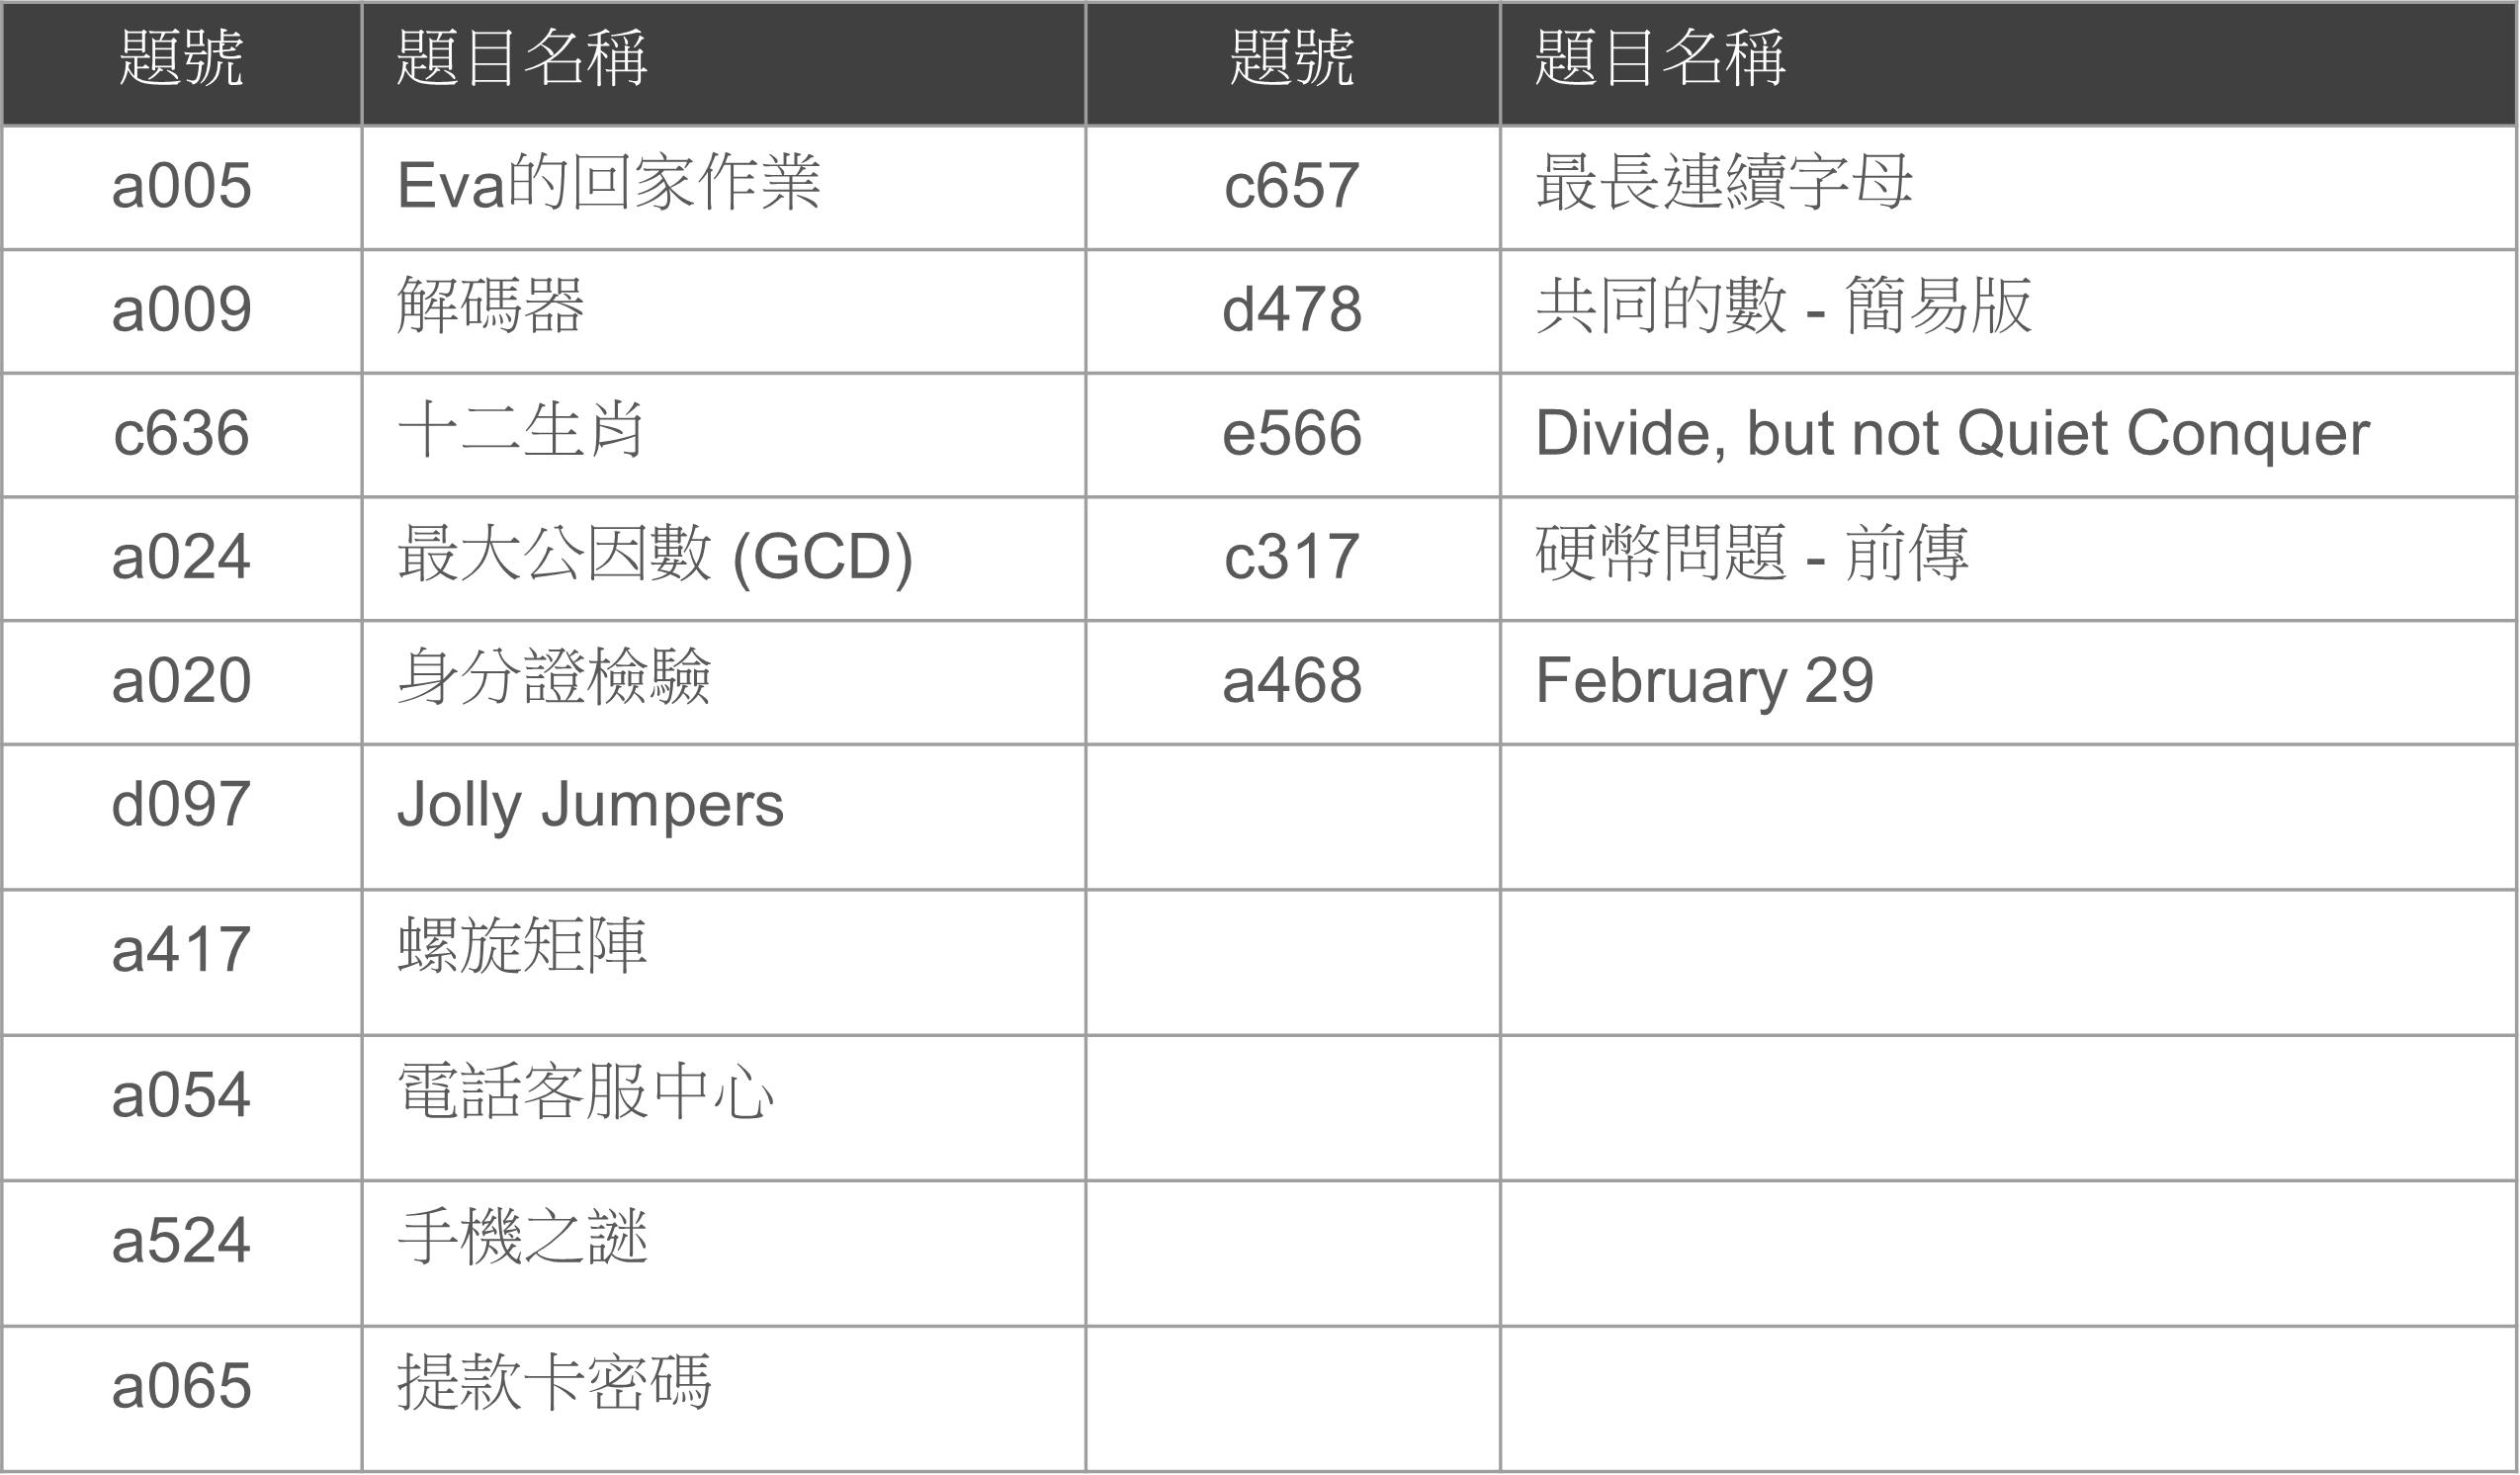

### [a005. Eva 的回家作業](https://zerojudge.tw/ShowProblem?problemid=a005)
#### **題目說明：**
#### Eva的家庭作業裏有很多數列填空練習。填空練習的要求是：已知數列的前四項，填出第五項。因 為已經知道這些數列只可能是等差或等比數列，她決定寫一個程式來完成這些練習。

#### **輸入說明：**
*   第一行是數列的數目t（0 <= t <= 20）。
*   以下每行均包含四個整數，表示數列的前四項
*   約定數列的前五項均為不大於10^5的自然數，等比數列的比值也是自然數

#### **輸出說明：**
*   對輸入的每個數列，輸出它的前五項。

```python
Sample Input #1 :
2
1 2 3 4
1 2 4 8

Sample Output #1 :
1 2 3 4 5
1 2 4 8 16
```

In [ ]:
def solve(a, b, c, d):
  # Check for arithmetic progression
  if b - a == c - b and c - b == d - c:
      next_term = d + (b - a)
      print(a, b, c, d, next_term)
  # Check for geometric progression
  elif b != 0 and a != 0 and b // a == c // b and c // b == d // c and b % a == 0 and c % b == 0 and d % c == 0:
        next_term = d * (b // a)
        print(a, b, c, d, next_term)
  else:
      pass

t = int(input())
for _ in range(t):
  a, b, c, d = map(int, input().split())
  solve(a, b, c, d)

<br>

### [a009. 解碼器](https://zerojudge.tw/ShowProblem?problemid=a009)
#### **題目說明：**
#### 在密碼學裡面有一種很簡單的加密方式，就是把明碼的每個字元加上某一個整數K而得到密碼的字元（明碼及密碼字元一定都在ASCII碼中可列印的範圍內）。例如若K=2，那麼apple經過加密後就變成crrng了。解密則是反過來做。這個問題是給你一個密碼字串，請你依照上述的解密方式輸出明碼。
#### 至於在本任務中K到底是多少，請自行參照Sample Input及Sample Output推出來吧！相當簡單的。

#### **輸入說明：**
*   輸入共一行，每行含有1個字串，就是需要解密的明碼。

#### **輸出說明：**
*   對每一測試資料，請輸出解密後的密碼。

```python
Sample Input #1 :
1JKJ'pz'{ol'{yhklthyr'vm'{ol'Jvu{yvs'Kh{h'Jvywvyh{pvu5

Sample Output #1 :
*CDC is the trademark of the Control Data Corporation.
```

```python
Sample Input #2 :
1PIT'pz'h'{yhklthyr'vm'{ol'Pu{lyuh{pvuhs'I|zpulzz'Thjopul'Jvywvyh{pvu5

Sample Output #2 :
*IBM is a trademark of the International Business Machine Corporation.
```

#### **解題想法**
*   '1' (ASCII 49) becomes '*'
*   'J' (ASCII 74) becomes 'C'



In [ ]:
print(ord("1"))
print(ord("*"))

In [ ]:
def decode_message(encoded_string):
  shift = -7
  decoded_string = ""
  for char in encoded_string:
    decoded_string += chr(ord(char) + shift)
  print(decoded_string)

encoded_input = input()
decode_message(encoded_input)

<br>

### [c636. 十二生肖](https://zerojudge.tw/ShowProblem?problemid=c636)
#### **題目說明：**
#### 民國元年 ( 1912 ) 是鼠年。給定若干個民國年份   -100 ~ 107, 請輸出該年生肖為何。

```python
Sample Input #1 :
1
107

Sample Output #1 :
鼠
狗
```

#### **解題想法**
*   沒有民國 0 年 !
*   民國 -1 年接下來就是民國 1 年

In [ ]:
import sys, io
animals = ["鼠", "牛", "虎", "兔", "龍", "蛇", "馬", "羊", "猴", "雞", "狗", "豬"]
DATA = """\
-1
107
"""
sys.stdin = io.StringIO(DATA)

for s in sys.stdin:
  year = int(s)
  year += 1911

  # 沒有0年, 所以要補償1年
  if year < 1912:
    year += 1

  print(animals[(year - 1912) % 12])

<br>

### [a020. 身分證檢驗](https://zerojudge.tw/ShowProblem?problemid=a020)
#### **題目說明：**
#### 我國的身分證字號有底下這樣的規則，因此對於任意輸入的身分證字號可以有一些基本的判斷原則，請您來判斷一個身分證字號是否是正常的號碼(不代表確有此號、此人)

1. 英文代號以下表轉換成數字
  ```
    A=10 台北市     J=18 新竹縣     S=26 高雄縣
    B=11 台中市     K=19 苗栗縣     T=27 屏東縣
    C=12 基隆市     L=20 台中縣     U=28 花蓮縣
    D=13 台南市     M=21 南投縣     V=29 台東縣
    E=14 高雄市     N=22 彰化縣     W=32 金門縣
    F=15 台北縣     O=35 新竹市     X=30 澎湖縣
    G=16 宜蘭縣     P=23 雲林縣     Y=31 陽明山
    H=17 桃園縣     Q=24 嘉義縣     Z=33 連江縣
    I=34 嘉義市     R=25 台南縣
  ```
    

2. 英文轉成的數字, 個位數乘９再加上十位數的數字
3. 各數字從右到左依次乘１、２、３、４．．．．８
4. 求出(2),(3) 及最後一碼的和
5. (4)除10 若整除，則為 real，否則為 fake

```
例： T112663836

2 + 7*9 + 1*8 + 1*7 + 2*6 + 6*5 + 6*4 + 3*3 + 8*2 + 3*1 + 6 = 180

除以 10 整除，因此為 real
```

```python
Sample Input #1 :
T112663836

Sample Output #1 :
real
```
```python
Sample Input #2 :
S154287863

Sample Output #2 :
fake
```

In [ ]:
import sys

def translateCode(ch):
    CODE = {'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16, 'H':17, 'I':34,
            'J':18, 'K':19, 'L':20, 'M':21, 'N':22, 'O':35, 'P':23, 'Q':24, 'R':25,
            'S':26, 'T':27, 'U':28, 'V':29, 'W':32, 'X':30, 'Y':31, 'Z':33}

    return CODE[ch]

#start
for s in sys.stdin:
    testID = list(s)

    areaCode = translateCode(testID[0])

    x1 = int(areaCode/10)
    x2 = (areaCode%10)*9

    xN = 0

    for i in range(1,8+1):
        xN += (ord(testID[i])-48) * (9-i)

    x9 = ord(testID[9])-48

    verify_code = (x1+x2+xN+x9)%10

    if verify_code == 0:
        print("real")
    else:
        print("fake")

<br>

### [a024. 最大公因數(GCD)](https://zerojudge.tw/ShowProblem?problemid=a024)
#### **題目說明：**
#### 給定兩個整數，請求出它們的最大公因數

```python
Sample Input #1 :
12 15

Sample Output #1 :
3
```
```python
Sample Input #2 :
1 100

Sample Output #2 :
1
```

In [ ]:
s = input()
s = s.split()
a = int(s[0])
b = int(s[1])

while a != b:
  if a > b:
    a, b = b, a - b
  else:
    a, b = b - a, a

print(a)

In [ ]:
s = input()
s = s.split()
a = int(s[0])
b = int(s[1])

def GCD(a, b):
    r = a % b
    if r == 0:
        return b
    return GCD(b, r)

print(GCD(max(a, b), min(a, b)))

<br>

### [d097. 10038 - Jolly Jumpers](https://zerojudge.tw/ShowProblem?problemid=d097)
#### **題目說明：**
#### 有n個整數的序列我們稱為jolly jumper，如果相鄰的2個數其差的絕對值恰好為1到n-1。例如：
* 1 4 2 3
#### 就是jolly jumper（n=4）。因為相鄰2數的差的絕對值為3,2,1，就是1到n-1。
#### 但是
* 1 4 2 -1 6
#### 不是jolly jumper（n=5）。因為相鄰2數的差的絕對值為3,2,3,7，並非1到n-1。
#### 你的任務是寫一個程式來判斷一個整數序列是否為jolly jumper。

In [ ]:
while True:
    try:
        #start
        nums = list(map(int, input().split()))
        n = nums[0]
        nums.pop(0)

        delta = [ 0 for x in range(n) ]

        for i in range(1, n):
            d = abs(nums[i]-nums[i-1])
            if d <= n-1:
                delta[d] += 1

        isJolly = True

        for i in range(1, n):
            if delta[i] != 1:
                isJolly = False
                break

        if isJolly == True:
            print("Jolly")
        else:
            print("Not jolly")
    except:
        break

In [ ]:
# 使用字典
while True:
    try:
      nums = list(map(int, input().split()))
      n = nums[0]

      dic = {}
      for i in range(1, n):
          dic[i] = 1

      isJolly = True

      for i in range(1, n):
          delta = abs(nums[i]-nums[i+1])
          if delta in dic:
            del dic[delta]
          else:
            isJolly = False
            break

      if isJolly == True:
          print("Jolly")
      else:
          print("Not jolly")
    except:
        break

<br>

### [a524. 手機之謎](https://zerojudge.tw/ShowProblem?problemid=a524)
#### **題目說明：**
#### 鄭學長的手機裡有不可告人的秘密，為了不被發現那些照片和簡訊，他小心翼翼地把手機上鎖了。
#### 幸好，你是個會寫程式的天才，你能夠產生所有的密碼去嘗試，現在趕快動手吧！
#### 噢！還有一件事，基於某些理由，你知道鄭學長的密碼沒有重覆的字

### **輸入說明**
*   輸入為一個 n (n<=8)，代表鄭學長的密碼位數。

### **輸出說明**
* 輸出所有可能的密碼，依字典順序反向排列（因為你覺得他的密碼應該在後半段）。

```python
Sample Input #1
3
2

Sample Output #2
321
312
231
213
132
123
21
12
```

In [ ]:
import sys

N = 0

# 答案的數列
ans = [ 0 for i in range(10) ]

# 記錄數字出現的次數，避免重複挑選
num_times = [ 0 for i in range(10) ]

def find_next(step):

    if step == N+1:
        for i in range(1, N+1):
            print(ans[i], end='')
        print()

    for x in range(N, 0, -1):
        if num_times[x] == 0:
            ans[step] = x
            num_times[x] = 1

            find_next(step+1)
            num_times[x] = 0

#start
for s in sys.stdin:

    if s[0]!='\n': #需要加入此行, 請參考 a524 本題討論
        N = int(s)
        find_next(1)


<br>

### [a054. 電話客服中心](https://zerojudge.tw/ShowProblem?problemid=a054)
#### **題目說明：**
#### 很多銀行及公司設立了電話客服中心來服務他們的客戶。為了加速身分的查核，常常會要求打電話進來的客戶輸入他的身分證號碼。可是電話上只有數字鍵，要輸入身分證號碼的第一個字母有點麻煩，因此有的語音系統會要求來電者輸入後 9 碼，再根據後 9 碼來推算可能的英文字母。
#### 很多人都知道，身分證號碼的最後一碼是「檢查碼」，它是用前 9 碼所推算出來的，其推算的規則如下：

1.   先依照下表將英文字母轉換為 2 位數字，再加上第 2 到第 9 位的 8 位數字一共有 10 位數字。
      ```python
      台北市 A 10   彰化縣 N 22
      台中市 B 11   新竹市 O 35
      基隆市 C 12   雲林縣 P 23
      台南市 D 13   嘉義縣 Q 24
      高雄市 E 14   台南縣 R 25
      台北縣 F 15   高雄縣 S 26
      宜蘭縣 G 16   屏東縣 T 27
      桃園縣 H 17   花蓮縣 U 28
      嘉義市 I 34   台東縣 V 29
      新竹縣 J 18   金門縣 W 32
      苗栗縣 K 19   澎湖縣 X 30
      台中縣 L 20   陽明山 Y 31
      南投縣 M 21   連江縣 Z 33
      ```
2.   由左至右，第一位乘 1，第二位乘 9，第三位乘 8，第四位乘 7...，以此類推，最後一位乘 1。

3.   求各位相對數字乘積的總和 s。

4.   求 s 的個位數 m。(檢查碼只有一位數，因此若 c = 10 時，則檢查碼為 0。)
5.   檢查碼 c = 10 - m 。

#### 假設某人的身份證號碼前 9 碼為 F13024567，那麼他的最後一位檢查碼的計算過程如下:
*    F         1    3    0    2    4    5    6    7
*    1    5    1    3    0    2    4    5    6    7
* ×1   ×9    ×8    ×7   ×6    ×5    ×4    ×3    ×2   ×1
* 1 + 45 +  8 + 21 +  0 + 10 + 16 + 15 + 12 +  7 = 135

#### 檢查碼 = 10 - (135 % 10) = 5

#### 根據上面的規則，A12345678、M12345678 和 W12345678 這三個號碼的檢查碼都是 9。因此，如果在電話上所輸入的後 9 碼是 123456789 時，它的第一位英文字母可能是 A，也可能是 M 或 W。

### **輸入說明**
*   輸入只有一行，含有一個身份證號碼的後 9 碼。

### **輸出說明**
* 將可能的第一位大寫字母依字母順序輸出於一行。

```python
Sample Input #1
130245675

Sample Output #1
FS
```

```python
Sample Input #2
123456789

Sample Output #2
AMW
```


In [ ]:
import sys

CODE = {'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16, 'H':17, 'I':34,
        'J':18, 'K':19, 'L':20, 'M':21, 'N':22, 'O':35, 'P':23, 'Q':24, 'R':25,
        'S':26, 'T':27, 'U':28, 'V':29, 'W':32, 'X':30, 'Y':31, 'Z':33}

code_string = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

codeSum = []

#set x1+x2
for i in range(26):
    x1 = int(CODE[code_string[i]]/10)
    x2 = CODE[code_string[i]]%10*9

    codeSum.append( x1+x2 )

#start
for s in sys.stdin:

    testID = list(s)

    checkSum = int(testID[8])

    xN = 0

    for i in range(7+1):
        xN += int(testID[i])*(8-i)

    for x in range(26):
        if (codeSum[x]+xN+checkSum)%10 == 0:
            word = code_string[x]
            print(word, end='')
    print()



<br>

### [a065. 提款卡密碼](https://zerojudge.tw/ShowProblem?problemid=a065)
#### **題目說明：**
#### 文文記性不太好，常常會忘東忘西。他也常忘記提款卡密碼，每次忘記密碼都得帶著身份證、存摺、印章親自到銀行去重設密碼，還得繳交 50 元的手續費，很是麻煩。後來他決定把密碼寫在提款卡上免得忘記，但是這樣一來，萬一提款卡掉了，存款就會被盜領。因此他決定以一個只有他看得懂的方式把密碼寫下來。

#### 他的密碼有 6 位數，所以他寫下了 7 個大寫字母，相鄰的每兩個字母間的「距離」就依序代表密碼中的一位數。所謂「距離」指的是從較「小」的字母要數幾個字母才能數到較「大」字母。字母的大小則是依其順序而定，越後面的字母越「大」。

#### 假設文文所寫的 7 個字母是 POKEMON，那麼密碼的第一位數就是字母 P 和 O 的「距離」，由於 P 就是 O 的下一個字母，因此，從 O 開始只要往下數一個字母就是 P 了，所以密碼的第一位數就是 1。密碼的第二位數則是字母 O 和 K 的「距離」，從 K 開始，往下數 4 個字母 (L, M, N, O) 就到了 O，所以第二位數是 4，以此類推。因此，POKEMON 所代表的密碼便是 146821。

#### 噓！你千萬別把這個密秘告訴別人哦，要不然文文的存款就不保了。


### **輸入說明**
* 輸入只有一行，含有 7 個相連的大寫英文字母。

### **輸出說明**
* 輸出文文的提款卡密碼。(我知道，我不會讓其他的人看到！)

```python
Sample Input #1
POKEMON

Sample Output #1
146821
```

```python
Sample Input #2
TYPHOON

Sample Output #2
598701
```

In [ ]:
#解法1
import sys

CODE = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
        'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
        'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def encode(c1, c2):
    num1 = -1
    num2 = -1
    r = -1

    if c1 in CODE:
        num1 = CODE.index(c1)+1

    if c2 in CODE:
        num2 = CODE.index(c2)+1
    

    if num1>=num2:
        r = num1 - num2
    elif num1<num2:
        r = num2 - num1
    else:
        r = num1 - num2

    return r        

for s in sys.stdin:
    data = list(s)
    #移除最後的 '\n'
    data.pop()

    for i in range(len(data)-1):
        result = encode(data[i], data[i+1])
        print(result, end='')

    print()

In [ ]:
#解法2
inputs = input()
result = ""
for i in range(len(inputs)-1):
    diff = abs(ord(inputs[i]) - ord(inputs[i+1]))
    result += str(diff)
print(result)

<br>

### [c657. 最長連續字母](https://zerojudge.tw/ShowProblem?problemid=c657)
#### **題目說明：**
#### 測資有若干行字串。
#### 每個字串是由小寫字母組成。
#### 請找出字串中最長連續的字母，並輸出其長度。
#### 如果有長度相同的連續字母，請輸出最先出現的。

```python
Sample Input #1
abbcc
cciiiiiiiixxxxxxxxxxxxguuuuuuufugpccccccc

Sample Output #1
b 2
x 12
```

In [ ]:
import sys, io
DATA = """\
abbcc
cciiiiiiiixxxxxxxxxxxxguuuuuuufugpccccccc
"""
sys.stdin = io.StringIO(DATA)

#start
for s in sys.stdin:
    data = list(s)
    data.pop()

    length = len(data)

    first_char = ''
    temp_char = ''
    sum_char = 0
    temp_sum = 1

    for i in range(length):
        if i == 0:
            first_char = data[0]
            sum_char = 1
            continue
        
        if data[i] == data[i-1]:
            temp_char = data[i]
            temp_sum +=1
            if temp_sum > sum_char:
                first_char = temp_char
                sum_char = temp_sum
        else:
            if temp_sum > sum_char:
                first_char = temp_char
                sum_char = temp_sum
            temp_char = data[i]
            temp_sum = 1

    #end of for
    print(first_char, sum_char)


b 2
x 12


<br>

### [d478. 共同的數 - 簡易版](https://zerojudge.tw/ShowProblem?problemid=d478)
#### **題目說明：**
#### 因為學長覺得d136太可怕，所以出一題簡單版的XD
#### 小潘跟小花都有很多個正整數，自己的數不會有重覆出現的，而且都是遞增排列。
#### 現在她們想要知道，兩個人的數有幾個重覆的呢？

### **輸入說明**
* 第一行有兩個數字n,m。 (1<=n<=100,1<=m<=10000)
* 接著共有n筆測資，每筆測資共有兩行，分別代表兩個人擁有的數，每行共有m個數。
* 所有數字都不大於231-1。

### **輸出說明**
* 每筆測資請輸出一個數字，代表兩個人的數有幾個重覆的。

```python
Sample Input #1
2 6
1 5 6 8 9 13
3 4 5 7 8 11
4 6 7 14 16 23
6 9 12 13 16 23

Sample Output #1
2
3
```

In [ ]:
#V2
import sys


# start
Line1 = input()

Line1 = Line1.split()
N = int(Line1[0])
M = int(Line1[1])

for i in range(N):

    sum = 0

    data1 = input()
    data2 = input()

    data = data1+" "+data2 # 1 5 6 8 9 13 3 4 5 7 8 11
    seq = list(map(int, data.split()))

    seq.sort() #排序 -> # 1 3 4 5 5 6 7 8 8 9 11 13

    for x in range(len(seq)-1):
        if seq[x] == seq[x+1]:
            sum +=1

    print(sum)

In [ ]:
import sys

N = 0

# 答案的數列
ans = [ 0 for i in range(10) ]

Line1 = Line1.split()
N = int(Line1[0])
M = int(Line1[1])

for i in range(N):

    sum = 0

    data = input()
    seq1 = list(map(int, data.split()))

    data2 = input()
    seq2 = list(map(int, data2.split()))


    for j in seq1:    # 5
        if j in seq2: # 3 4 5 7 8 11
            sum +=1


    print(sum)